In [3]:
# Facial detection using openCV 7_22_2020
'''
detect the diffference in light and dark areas
calculate the average value of dark area and light area
subtract and get the difference ==Delta 
If this Delta is sufficient (above the threshold set), then consider 'edge' being there.

getting the values, and Sum them, then add by the number to get Ave is very computationally expensive

Viola-Jones came up w algo to reduce the intensity of calculation by using integral image 0(1) in O notation

pre-caluculate the integral image => called 'SUMMED AREA TABLE'
Don't scan but cascade of classifiers...

Step1:  look front
Step2:  Gray scale
Step3:  Classifiers of features,  if there, keep going... if all are there, FACE :)

Pre-trained classifiers are already in the CV2 library in XML. 

'''

"\ndetect the diffference in light and dark areas\ncalculate the average value of dark area and light area\nsubtract and get the difference ==Delta \nIf this Delta is sufficient (above the threshold set), then consider 'edge' being there.\n\ngetting the values, and Sum them, then add by the number to get Ave is very computationally expensive\n\nViola-Jones came up w algo to reduce the intensity of calculation by using integral image 0(1) in O notation\n\npre-caluculate the integral image => called 'SUMMED AREA TABLE'\nDon't scan but cascade of classifiers...\n\nStep1:  look front\nStep2:  Gray scale\nStep3:  Classifiers of features,  if there, keep going... if all are there, FACE :)\n\nPre-trained classifiers are already in the CV2 library in XML. \n\n"

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

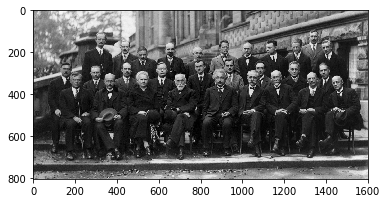

In [20]:
#reading in image:  has to be gray scale
nadia = cv2.imread('./original/Computer-Vision-with-Python/DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('./original/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('./original/Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)

# plt.imshow(nadia)
# plt.imshow(denis)
plt.imshow(solvay, cmap = 'gray')
                   

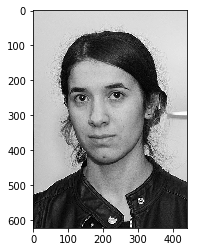

In [21]:
plt.imshow(nadia, cmap = 'gray')

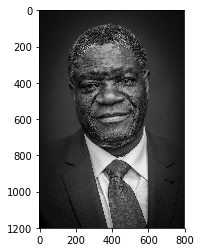

In [22]:
plt.imshow(denis, cmap='gray')

In [8]:
'''
CascadeClassifier: 
After a classifier is trained, it can be applied to a region of interest 
(of the same size as used during the training) in an input image. 
The classifier outputs a “1” if the region is likely 
to show the object (i.e., face/car), and “0” otherwise

The classifier is designed so that it can be easily “resized” 
in order to be able to find the objects of interest at different sizes,
which is more efficient than resizing the image itself. 
So, to find an object of an unknown size 
in the image the scan procedure should be done several times 
at different scales.
'''

'\nCascadeClassifier: \nAfter a classifier is trained, it can be applied to a region of interest \n(of the same size as used during the training) in an input image. \nThe classifier outputs a “1” if the region is likely \nto show the object (i.e., face/car), and “0” otherwise\n\nThe classifier is designed so that it can be easily “resized” \nin order to be able to find the objects of interest at different sizes,\nwhich is more efficient than resizing the image itself. \nSo, to find an object of an unknown size \nin the image the scan procedure should be done several times \nat different scales.\n'

In [23]:
# Step 1:  Set up a classifier (CV2 comes with various classifiers in XML)  
# There are tons of cascade files already in the folder

face_cascade = cv2.CascadeClassifier('./original/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [24]:
def detect_face(img):
    face_img = img.copy()
    # this below uses face_cascade object which uses the haarcascade_frontal... and based on the image, returns
    # the object that is then used to draw rectangle
    plt.imshow(face_img, cmap = 'gray')
    #return face_img
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rect:    
        # x,y are for coordinates 
        #or top left, w, h will give you the width and height 
        # to draw a rectangle
        # from there to get rectangle
        cv2.rectangle(face_img, (x,y), (x+w, y+h),(255,255,255),10)    #(img,top_left, diagnal right, color(white), thickness)
        
    return face_img
    

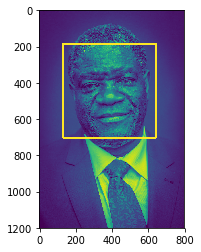

In [26]:
face = detect_face(denis)
plt.imshow(face)

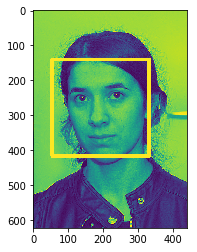

In [27]:
face = detect_face(nadia)
plt.imshow(face)

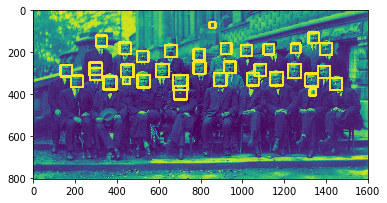

In [28]:
face = detect_face(solvay)
plt.imshow(face)

## there are some errors below where double and building...so adding:
# 1. scale factor and 
# 2. minimum neighbors

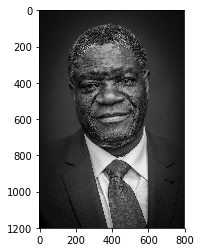

In [11]:
# results = detect_face(denis)

In [12]:
#face_rect = face_cascade.detectMultiScale(denis, 1.3,5)   # Xml file is missing.

In [29]:
#####################################
# adding below: 
# 1. scale factor and 
# 2. minimum neighbors

def adj_detect_face(img):
    face_img = img.copy()
    # this below uses face_cascade object which uses the haarcascade_frontal... and based on the image, returns
    # the object that is then used to draw rectangle
    plt.imshow(face_img, cmap = 'gray')
    #return face_img
    face_rect = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2, minNeighbors = 5)
    
    for (x,y,w,h) in face_rect:    
        # x,y are for coordinates 
        #or top left, w, h will give you the width and height 
        # to draw a rectangle
        # from there to get rectangle
        cv2.rectangle(face_img, (x,y), (x+w, y+h),(255,255,255),10)    #(img,top_left, diagnal right, color(white), thickness)
        
    return face_img
    

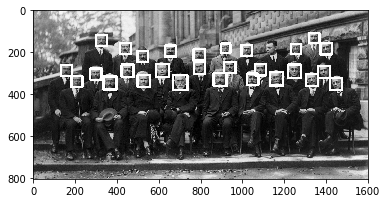

In [33]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap = 'gray')

In [42]:
#  Now we will look at eyecascade
eye_cascade = cv2.CascadeClassifier('./original/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [43]:
def detect_eyes(img):
    eye_img = img.copy()
    # this below uses face_cascade object which uses the haarcascade_frontal... and based on the image, returns
    # the object that is then used to draw rectangle
    #plt.imshow(eye_img, cmap = 'gray')
    #return face_img
    eye_rect = eye_cascade.detectMultiScale(eye_img)
    
    for (x,y,w,h) in eye_rect:    
        # x,y are for coordinates 
        #or top left, w, h will give you the width and height 
        # to draw a rectangle
        # from there to get rectangle
        cv2.rectangle(eye_img, (x,y), (x+w, y+h),(255,255,255),10)    #(img,top_left, diagnal right, color(white), thickness)
        
    return eye_img

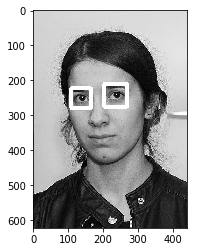

In [47]:
eye_result = detect_eyes(nadia)
plt.imshow(eye_result, cmap = 'gray')

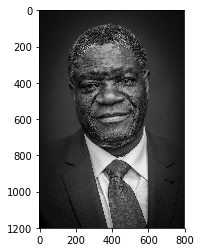

In [48]:
eye_result = detect_eyes(denis)
plt.imshow(eye_result, cmap = 'gray')